# 連續變數特徵工程 - 範例程式碼

- 本範例將使用 Kaggle 平台競賽中的 Identifying Age-Related Conditions 提供的資料集，連結如下：https://www.kaggle.com/competitions/icr-identify-age-related-conditions

- 本程式碼將詳細介紹以下數個知識點：
    - Max-Abs Scale
    - Min-Max Scale
    - Z 分數標準化(Z-Score Normalization)
    - Quantile Normalization
    - Binning
    - 統計數值填補
    - 迴歸模型填補 (Regression Imputation)
    - K 近鄰演算法(K-Nearest Neighbor; KNN) 填補
    - 以模型為導向的填補技巧(Model-Driven Imputation)nation

## 匯入套件並輸入資料

- primary key: Id
- target: Class

In [1]:
import pandas as pd

In [3]:
rawData = pd.read_csv("train.csv")
rawData.head(1)

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1


## 定義 Primary Key、連續型特徵、類別型特徵、目標類別

In [3]:
PKFeature = "Id"
mainTarget = "Class"
classicalFeature = "EJ"
numericalFeatures = [i for i in rawData.columns if i not in [PKFeature, mainTarget, classicalFeature]]

## 資料前處理
- 將 EJ 欄位的類別轉換成數值，規則如下：
    - A：0
    - B：1

In [4]:
EJ_mapping = {
    "A": 0,
    "B": 1
}
rawData["EJ"] = rawData["EJ"].map(EJ_mapping)

## 將原始資料切割成訓練與測試資料

- 訓練資料集比例：80%、測試資料集比例：20%
- shuffle = True: 將資料順序打亂

In [5]:
from sklearn.model_selection import train_test_split
trainData, testData = train_test_split(rawData, test_size = 0.2, shuffle = True)

## Max-Abs Scale
- 本次練習將使用 sklearn 套件中的 MaxAbsScaler 執行 Max-Abs Scale
- 舉例：將 AF 特徵做轉換，並用直方圖確認轉換前後的結果
- 本範例重點不在圖表繪製，對圖表繪製不熟悉的學員可參考 「D6：資料視覺化基本功」 內容

In [6]:
from sklearn.preprocessing import MaxAbsScaler
AF_train_original = trainData["AF"].values.reshape((-1, 1))
max_abs_scale = MaxAbsScaler().fit(AF_train_original) # 依照訓練資料中 AF 的最大值、最小值，定義 Max-Abs Scale 的規則
AF_train_transform = max_abs_scale.transform(AF_train_original)

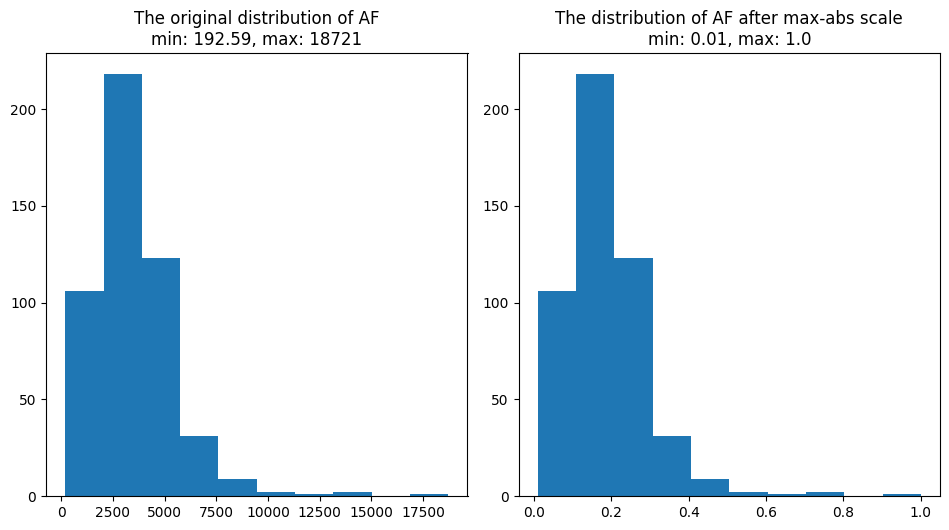

In [7]:
# 繪製直方圖以確認數值的範圍以及分布
import matplotlib.pyplot as plt
plt.figure(figsize = (9.60, 5.40))
plt.subplot(121)
plt.hist(AF_train_original.flatten())
plt.title("The original distribution of AF\nmin: {}, max: {}".format(round(AF_train_original.min(), 2), round(AF_train_original.max())))

plt.subplot(122)
plt.hist(AF_train_transform.flatten())
plt.title("The distribution of AF after max-abs scale\nmin: {}, max: {}".format(round(AF_train_transform.min(), 2), round(AF_train_transform.max(), 2)))
plt.tight_layout()
plt.show()

## Min-Max Scale
- 本次練習將使用 sklearn 套件中的 MinMaxScaler 執行 Min-Max Scale
- 舉例：將 AF 特徵做轉換
- 本範例重點不在圖表繪製，對圖表繪製不熟悉的學員可參考 「D6：資料視覺化基本功」 內容

In [8]:
from sklearn.preprocessing import MinMaxScaler
AF_train_original = trainData["AF"].values.reshape((-1, 1))
min_max_scale = MinMaxScaler().fit(AF_train_original) # 依照訓練資料中 AF 的最大值、最小值，定義 Min-Max Scale 的規則
AF_train_transform = min_max_scale.transform(AF_train_original)

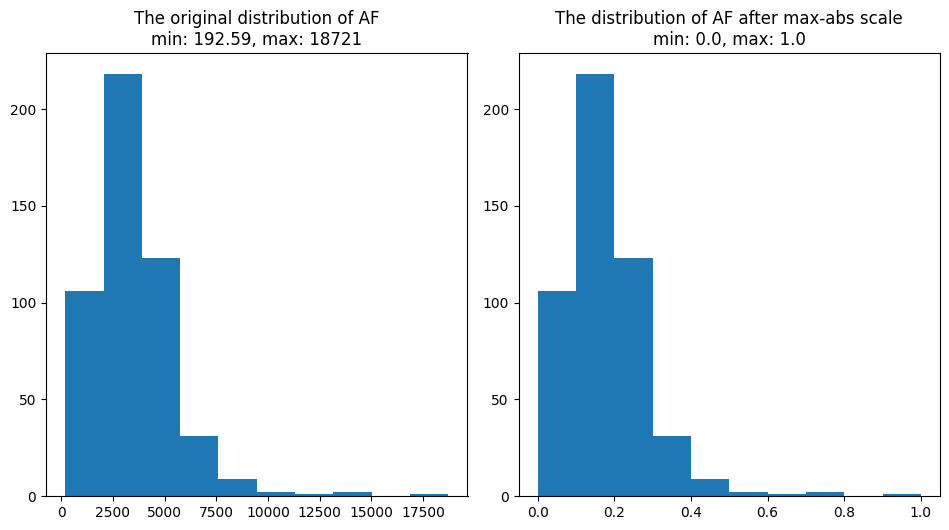

In [9]:
# 繪製直方圖以確認數值的範圍以及分布
import matplotlib.pyplot as plt
plt.figure(figsize = (9.60, 5.40))
plt.subplot(121)
plt.hist(AF_train_original.flatten())
plt.title("The original distribution of AF\nmin: {}, max: {}".format(round(AF_train_original.min(), 2), round(AF_train_original.max())))

plt.subplot(122)
plt.hist(AF_train_transform.flatten())
plt.title("The distribution of AF after max-abs scale\nmin: {}, max: {}".format(round(AF_train_transform.min(), 2), round(AF_train_transform.max(), 2)))
plt.tight_layout()
plt.show()

## Z 分數標準化(Z-Score Normalization)
- 本次練習將使用 sklearn 套件中的 StandardScaler 執行 Z-Score Normalization
- 舉例：將 AF 特徵做轉換
- 本範例重點不在圖表繪製，對圖表繪製不熟悉的學員可參考 「D6：資料視覺化基本功」 內容

In [10]:
from sklearn.preprocessing import StandardScaler
AF_train_original = trainData["AF"].values.reshape((-1, 1))
z_score_normalization = StandardScaler().fit(AF_train_original) # 依照訓練資料中 AF 的最大值、最小值，定義 Z-Score Normalization 的規則
AF_train_transform = z_score_normalization.transform(AF_train_original)

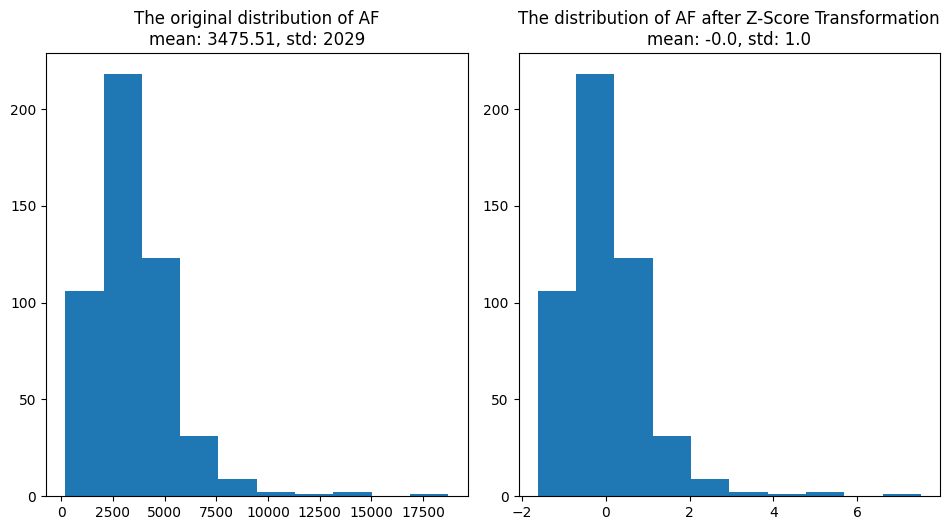

In [11]:
# 繪製直方圖以確認數值的範圍以及分布
import matplotlib.pyplot as plt
plt.figure(figsize = (9.60, 5.40))
plt.subplot(121)
plt.hist(AF_train_original.flatten())
plt.title("The original distribution of AF\nmean: {}, std: {}".format(round(AF_train_original.mean(), 2), round(AF_train_original.std())))

plt.subplot(122)
plt.hist(AF_train_transform.flatten())
plt.title("The distribution of AF after Z-Score Transformation\nmean: {}, std: {}".format(round(AF_train_transform.mean(), 2), round(AF_train_transform.std(), 2)))
plt.tight_layout()
plt.show()

## Quantile Normalization
- 本次練習將使用 sklearn 套件中的 quantile_transform 執行 Quantile Normalization
- 舉例：將 AF 特徵做轉換
- 本範例重點不在圖表繪製，對圖表繪製不熟悉的學員可參考 「D6：資料視覺化基本功」 內容

In [12]:
from sklearn.preprocessing import quantile_transform
AF_train_original = trainData["AF"].values.reshape((-1, 1))
AF_train_transform =quantile_transform(AF_train_original)

C:\python_3_10_9\lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (493). n_quantiles is set to n_samples.
  warnings.warn(


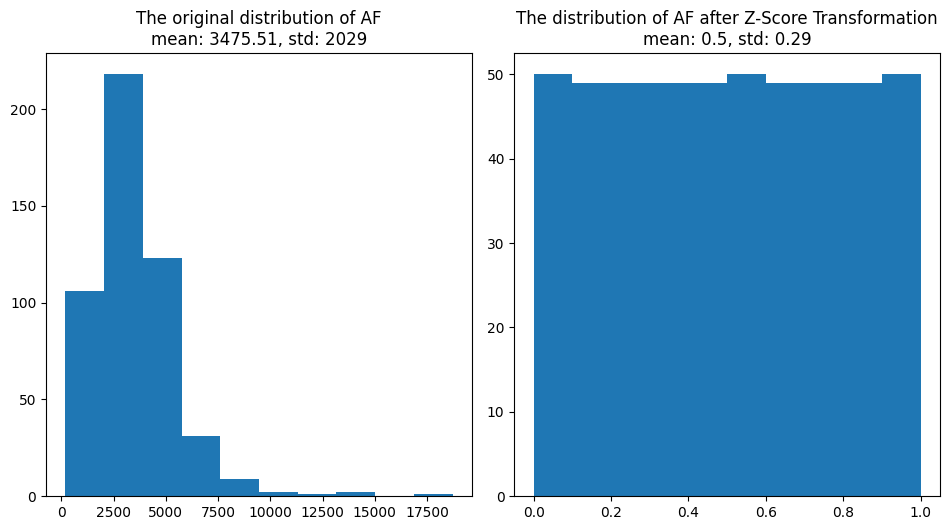

In [13]:
# 繪製直方圖以確認數值的範圍以及分布
import matplotlib.pyplot as plt
plt.figure(figsize = (9.60, 5.40))
plt.subplot(121)
plt.hist(AF_train_original.flatten())
plt.title("The original distribution of AF\nmean: {}, std: {}".format(round(AF_train_original.mean(), 2), round(AF_train_original.std())))

plt.subplot(122)
plt.hist(AF_train_transform.flatten())
plt.title("The distribution of AF after Z-Score Transformation\nmean: {}, std: {}".format(round(AF_train_transform.mean(), 2), round(AF_train_transform.std(), 2)))
plt.tight_layout()
plt.show()

## Binning
- 本次練習將使用分別使用以下三種方法示範 Binning
    - np.where()
    - pd.DataFrame.apply()
    - pd.cut()
- 舉例：將 AF 特徵做切割，並依照以下範圍定義類別
    - AF < 2167.38：0
    - 2167.38 <= AF < 3045.93：1
    - 3045.93 <= AF < 4306.18：2
    - 4306.18 <= AF：3

In [14]:
# 方法一：np.where()
import numpy as np
AF_train_original = trainData["AF"].values
AF_train_binning = np.where(
    AF_train_original < 2167.38, 0, 
    np.where(
        AF_train_original < 3045.93, 1, np.where(
            AF_train_original < 4306.18, 2, 3
        )
    )
)
pd.Series(AF_train_binning).value_counts() # 計算每個類別的數量

3    132
2    127
1    117
0    117
Name: count, dtype: int64

In [15]:
# 方法二：pd.DataFrame.apply()
AF_train_original = trainData["AF"]
AF_train_binning = AF_train_original.apply(lambda x: 0 if x < 2167.38 else 1 if x < 3045.93 else 2 if x < 4306.18 else 3)
AF_train_binning.value_counts() # 計算每個類別的數量

AF
3    132
2    127
1    117
0    117
Name: count, dtype: int64

In [16]:
# 方法三：pd.cut()
AF_train_original = trainData["AF"]
AF_train_binning = pd.cut(
    AF_train_original, 
    bins = [AF_train_original.min(), 2167.38, 3045.93, 4306.18, AF_train_original.max()+0.1], 
    right = False,
    labels = [0, 1, 2, 3]
)
AF_train_binning.value_counts() # 計算每個類別的數量

AF
3    132
2    127
0    117
1    117
Name: count, dtype: int64

## 統計數值填補
- 本次練習將使用以下兩種技巧實現統計數值填補
    - pandas 套件中的 .fillna()
    - sklearn 套件的 SimpleImputer 實現統計數值填補

In [17]:
# 方法一：pd.fillna()
# 連續變數以平均數填補
numericalFeaturesMean = trainData[numericalFeatures].mean()
trainData[numericalFeatures] = trainData[numericalFeatures].fillna(numericalFeaturesMean)

In [18]:
# 方法二：SimpleImputer
# 因下方還有練習，在此會先複製一份資料，資料填補完成後會直接指定為新資料
imputed_trainData = trainData.copy()
imputed_testData = testData.copy()

from sklearn.impute import SimpleImputer
simple_imputation = SimpleImputer().fit(trainData[numericalFeatures])
imputed_trainData[numericalFeatures] = simple_imputation.transform(trainData[numericalFeatures])
imputed_testData[numericalFeatures] = simple_imputation.transform(testData[numericalFeatures])

In [19]:
# 查看資料是否還有遺失值
imputed_trainData.info(), imputed_testData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 24 to 438
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      493 non-null    object 
 1   AB      493 non-null    float64
 2   AF      493 non-null    float64
 3   AH      493 non-null    float64
 4   AM      493 non-null    float64
 5   AR      493 non-null    float64
 6   AX      493 non-null    float64
 7   AY      493 non-null    float64
 8   AZ      493 non-null    float64
 9   BC      493 non-null    float64
 10  BD      493 non-null    float64
 11  BN      493 non-null    float64
 12  BP      493 non-null    float64
 13  BQ      493 non-null    float64
 14  BR      493 non-null    float64
 15  BZ      493 non-null    float64
 16  CB      493 non-null    float64
 17  CC      493 non-null    float64
 18  CD      493 non-null    float64
 19  CF      493 non-null    float64
 20  CH      493 non-null    float64
 21  CL      493 non-null    float64
 22  CR    

(None, None)

## 迴歸模型填補 (Regression Imputation)
- 本範例將使用 sklearn 套件中的 IterativeImputer 實現迴歸模型填補

In [20]:
# 因下方還有練習，在此會先複製一份資料，資料填補完成後會直接指定為新資料
imputed_trainData = trainData.copy()
imputed_testData = testData.copy()

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
regression_imputation = IterativeImputer().fit(trainData[numericalFeatures])
imputed_trainData[numericalFeatures] = regression_imputation.transform(trainData[numericalFeatures])
imputed_testData[numericalFeatures] = regression_imputation.transform(testData[numericalFeatures])

In [21]:
# 查看資料是否還有遺失值
imputed_trainData.info(), imputed_testData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 24 to 438
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      493 non-null    object 
 1   AB      493 non-null    float64
 2   AF      493 non-null    float64
 3   AH      493 non-null    float64
 4   AM      493 non-null    float64
 5   AR      493 non-null    float64
 6   AX      493 non-null    float64
 7   AY      493 non-null    float64
 8   AZ      493 non-null    float64
 9   BC      493 non-null    float64
 10  BD      493 non-null    float64
 11  BN      493 non-null    float64
 12  BP      493 non-null    float64
 13  BQ      493 non-null    float64
 14  BR      493 non-null    float64
 15  BZ      493 non-null    float64
 16  CB      493 non-null    float64
 17  CC      493 non-null    float64
 18  CD      493 non-null    float64
 19  CF      493 non-null    float64
 20  CH      493 non-null    float64
 21  CL      493 non-null    float64
 22  CR    

(None, None)

## K 近鄰演算法(K-Nearest Neighbor; KNN) 填補

In [22]:
# 因下方還有練習，在此會先複製一份資料，資料填補完成後會直接指定為新資料
imputed_trainData = trainData.copy()
imputed_testData = testData.copy()

from sklearn.impute import KNNImputer
knn_imputation = KNNImputer().fit(trainData[numericalFeatures])
imputed_trainData[numericalFeatures] = knn_imputation.transform(trainData[numericalFeatures])
imputed_testData[numericalFeatures] = knn_imputation.transform(testData[numericalFeatures])

In [23]:
# 查看資料是否還有遺失值
imputed_trainData.info(), imputed_testData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 24 to 438
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      493 non-null    object 
 1   AB      493 non-null    float64
 2   AF      493 non-null    float64
 3   AH      493 non-null    float64
 4   AM      493 non-null    float64
 5   AR      493 non-null    float64
 6   AX      493 non-null    float64
 7   AY      493 non-null    float64
 8   AZ      493 non-null    float64
 9   BC      493 non-null    float64
 10  BD      493 non-null    float64
 11  BN      493 non-null    float64
 12  BP      493 non-null    float64
 13  BQ      493 non-null    float64
 14  BR      493 non-null    float64
 15  BZ      493 non-null    float64
 16  CB      493 non-null    float64
 17  CC      493 non-null    float64
 18  CD      493 non-null    float64
 19  CF      493 non-null    float64
 20  CH      493 non-null    float64
 21  CL      493 non-null    float64
 22  CR    

(None, None)

## 以模型為導向的填補技巧(Model-Driven Imputation)
- 本範例將以 Random Forest 作為填補遺失值使用的模型，並透過 sklearn 套件中的 IterativeImputer 實現填補
- 請注意：目前尚未分享模型種類，請先以呼叫隨機森林(Random Forest) 類別為例，後續會詳細說明該模型的理論。
- 請注意：IterativeImputer 能納入的模型僅以 sklearn 架構及其相關套件為主，深度學習框架(例如：Tensorflow、Pytorch) 無法使用本工具，須另行撰寫演算法。

In [24]:
# 因下方還有練習，在此會先複製一份資料，資料填補完成後會直接指定為新資料
imputed_trainData = trainData.copy()
imputed_testData = testData.copy()

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
rf_regression = RandomForestRegressor()
regression_imputation = IterativeImputer(rf_regression).fit(trainData[numericalFeatures])
imputed_trainData[numericalFeatures] = regression_imputation.transform(trainData[numericalFeatures])
imputed_testData[numericalFeatures] = regression_imputation.transform(testData[numericalFeatures])

In [25]:
# 查看資料是否還有遺失值
imputed_trainData.info(), imputed_testData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 24 to 438
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      493 non-null    object 
 1   AB      493 non-null    float64
 2   AF      493 non-null    float64
 3   AH      493 non-null    float64
 4   AM      493 non-null    float64
 5   AR      493 non-null    float64
 6   AX      493 non-null    float64
 7   AY      493 non-null    float64
 8   AZ      493 non-null    float64
 9   BC      493 non-null    float64
 10  BD      493 non-null    float64
 11  BN      493 non-null    float64
 12  BP      493 non-null    float64
 13  BQ      493 non-null    float64
 14  BR      493 non-null    float64
 15  BZ      493 non-null    float64
 16  CB      493 non-null    float64
 17  CC      493 non-null    float64
 18  CD      493 non-null    float64
 19  CF      493 non-null    float64
 20  CH      493 non-null    float64
 21  CL      493 non-null    float64
 22  CR    

(None, None)